# Consumo de alcohol

Sabéis que nos preocupa mucho la salud de los ciudadanos. Por eso nos han encargado hacer un análisis sobre el consumo de alcohol.

Los datos de referencia los encontraréis aquí: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv

Nos interesa conocer el consumo de alcohol, por tipo de bebida alcohólica para los distintos continentes y países. Además, sabiendo que el vino y la cerveza son los sospechosos habituales, podéis disponer estadísticas sobre estos dos casos en particular.

In [173]:
%pip install pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [174]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

df = pd.read_csv(url, sep=',')

df


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [175]:
df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [177]:
df.describe()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


<Axes: >

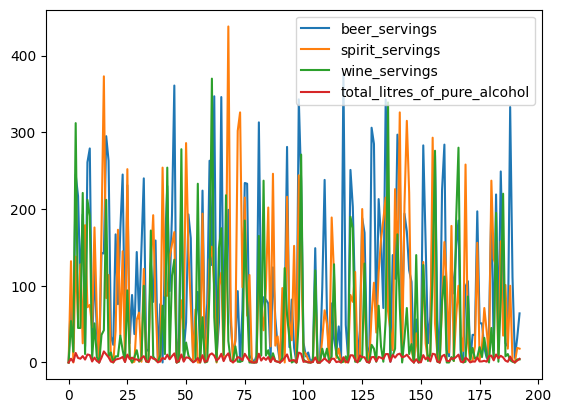

In [178]:
df.plot()


In [179]:
df_null_countries = df.isnull().sum()
df_null_countries


country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [180]:
set(df.continent)

{'AF', 'AS', 'EU', 'OC', 'SA', nan}

In [181]:
df_null = df[df.isnull().any(axis=1)]


In [182]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 5 to 184
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       23 non-null     object 
 1   beer_servings                 23 non-null     int64  
 2   spirit_servings               23 non-null     int64  
 3   wine_servings                 23 non-null     int64  
 4   total_litres_of_pure_alcohol  23 non-null     float64
 5   continent                     0 non-null      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ KB


In [183]:
df['continent'].fillna('NA', inplace=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_26292\3551674738.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['continent'].fillna('NA', inplace=True)


In [184]:
df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NA
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [185]:
set(df.continent)


{'AF', 'AS', 'EU', 'NA', 'OC', 'SA'}

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [187]:
df.describe(include='all')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193,193.000000,193.000000,193.000000,193.000000,193
unique,193,NaN,NaN,NaN,NaN,6
top,Afghanistan,NaN,NaN,NaN,NaN,AF
freq,1,NaN,NaN,NaN,NaN,53
mean,NaN,106.160622,80.994819,49.450777,4.717098,NaN
std,NaN,101.143103,88.284312,79.697598,3.773298,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,20.000000,4.000000,1.000000,1.300000,NaN
50%,NaN,76.000000,56.000000,8.000000,4.200000,NaN
75%,NaN,188.000000,128.000000,59.000000,7.200000,NaN


In [188]:
countries_per_continent = df.groupby('continent')['country'].count()
countries_per_continent


continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: country, dtype: int64

<Axes: xlabel='continent'>

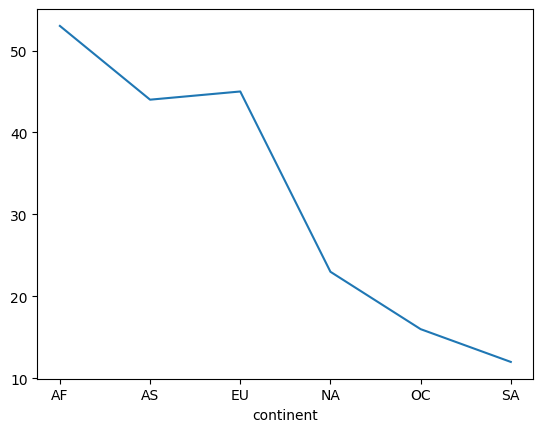

In [189]:
countries_per_continent.plot()

<Axes: >

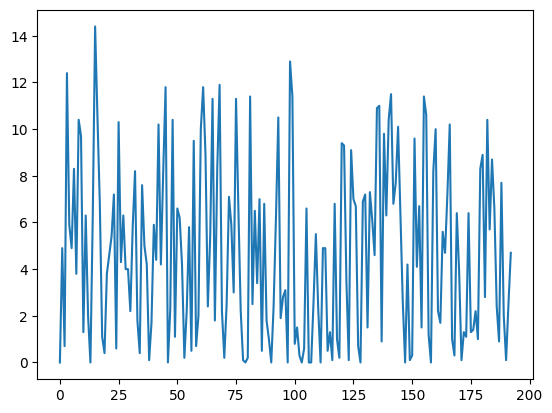

In [190]:
df['total_litres_of_pure_alcohol'].plot()

In [191]:
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False)

continent
EU    193.777778
SA    175.083333
NA    145.434783
OC     89.687500
AF     61.471698
AS     37.045455
Name: beer_servings, dtype: float64

<Axes: xlabel='continent'>

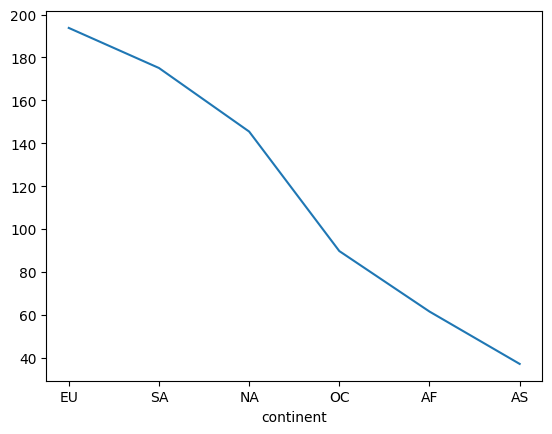

In [192]:
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).plot()


<BarContainer object of 193 artists>

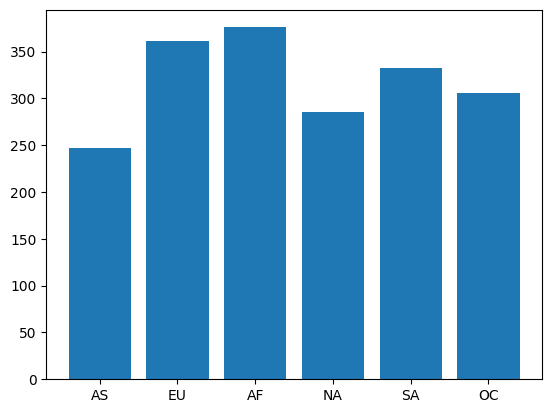

In [195]:
plt.bar(df.continent, df.beer_servings)
